In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('New_dataset.csv')

In [3]:
data.head()

,Sample No.,I Diameter (mm),O Diameter (mm),Weight (grams),Thickness (mm),Area (mm2),Load (kN),Stress (N/ mm2),Strength (N/ mm2)
0,1,67.62,89.80,259.18,11.09,2740.89,74.9,27.32,27.33
1,2,69.60,89.02,234.56,9.71,2418.11,77.2,31.91,31.93
2,3,62.82,88.32,280.05,12.75,3025.44,84.3,27.86,27.86
3,4,65.39,85.89,228.17,10.25,2434.47,75.8,31.13,31.14
4,5,69.98,87.62,202.55,8.82,2182.35,81.4,37.30,37.30


In [4]:
data.shape

(36, 9)

In [5]:
data.dtypes

Sample No.             object
I Diameter (mm)       float64
O Diameter (mm)       float64
Weight (grams)        float64
Thickness (mm)        float64
Area (mm2)            float64
 Load (kN)            float64
Stress (N/ mm2)       float64
 Strength (N/ mm2)    float64
dtype: object

In [6]:
data.isnull().sum()

Sample No.            0
I Diameter (mm)       0
O Diameter (mm)       0
Weight (grams)        0
Thickness (mm)        0
Area (mm2)            0
 Load (kN)            0
Stress (N/ mm2)       0
 Strength (N/ mm2)    0
dtype: int64

In [7]:
data.drop(columns=['Sample No.'], inplace=True)

In [8]:
#Target Conversion: Strength → Categories
def strength_class(value):
    if value < 30:
        return 'Low'
    elif value <= 35:
        return 'Medium'
    else:
        return 'High'

In [11]:
print("Column Names:", list(data.columns))

Column Names: ['I Diameter (mm)', 'O Diameter (mm)', 'Weight (grams)', 'Thickness (mm)', 'Area (mm2)', ' Load (kN)', 'Stress (N/ mm2)', ' Strength (N/ mm2)']


In [12]:
data['Strength_Class'] = data[' Strength (N/ mm2)'].apply(strength_class)

C:\Users\riyas\AppData\Local\Temp\ipykernel_6836\1597100224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Strength_Class'], palette='Set2')


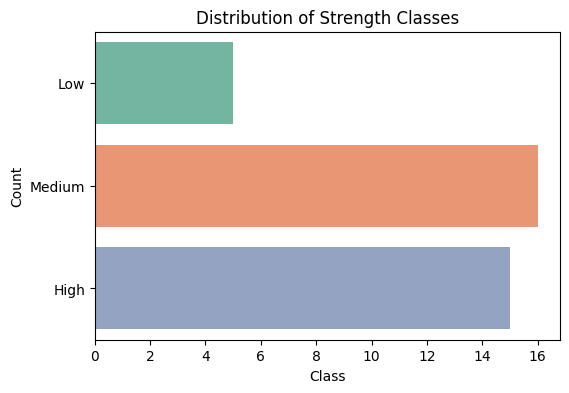

In [13]:
# Distribution of Target Classes
plt.figure(figsize=(6, 4))
sns.countplot(data['Strength_Class'], palette='Set2')
plt.title("Distribution of Strength Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [14]:
data.drop(columns=[' Strength (N/ mm2)'], inplace=True)

In [15]:
label_encoder = LabelEncoder()
data['Strength_Class_Label'] = label_encoder.fit_transform(data['Strength_Class'])

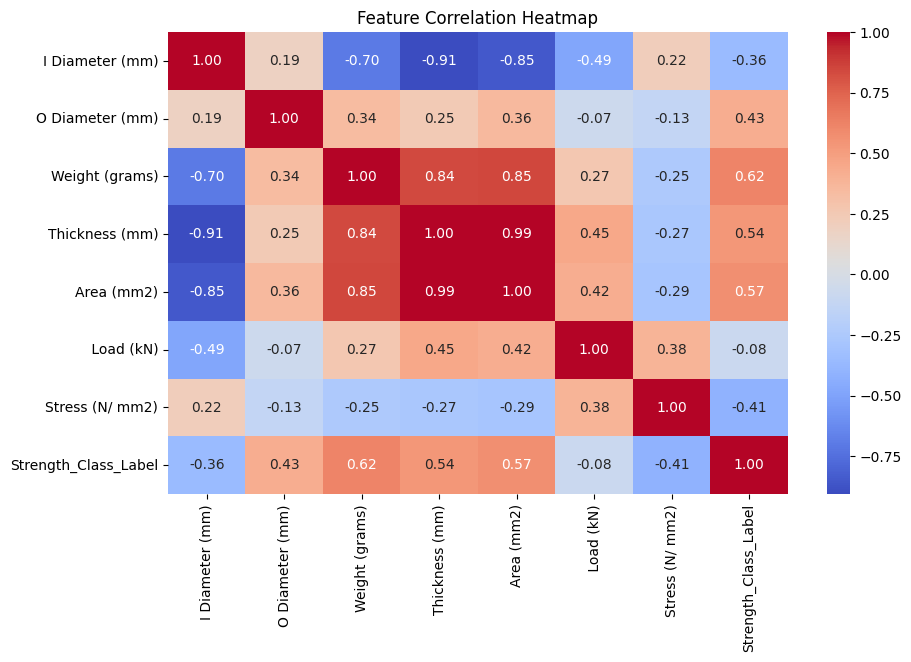

In [17]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [18]:
# 8. Separate features and labels
X = data.drop(columns=['Strength_Class', 'Strength_Class_Label'])
y = data['Strength_Class_Label']

In [19]:
# 9. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# 10. Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# 11. Train Models
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [22]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [23]:
# 12. Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation")
    print("-" * 40)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(
        y_true, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix Plot
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Logistic Regression Evaluation
----------------------------------------
Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         3
         Low       0.00      0.00      0.00         1
      Medium       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.60      0.67      0.63         8
weighted avg       0.78      0.88      0.82         8



C:\Users\riyas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\riyas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\riyas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

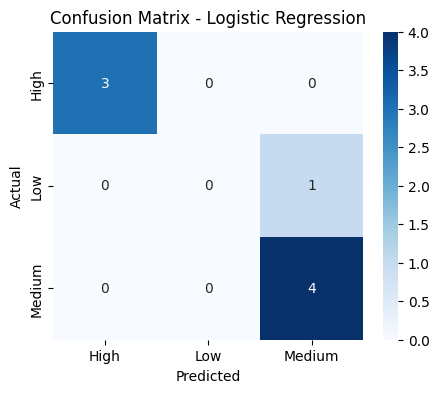


Random Forest Evaluation
----------------------------------------
Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         3
         Low       0.00      0.00      0.00         1
      Medium       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.60      0.67      0.63         8
weighted avg       0.78      0.88      0.82         8



C:\Users\riyas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\riyas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\riyas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

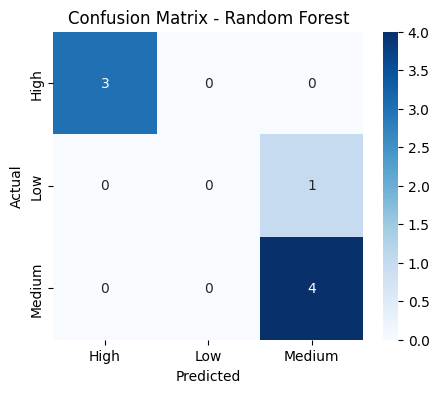

In [24]:
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

C:\Users\riyas\AppData\Local\Temp\ipykernel_6836\996861959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Logistic Regression", "Random Forest"], y=[acc_log, acc_rf], palette='Set3')


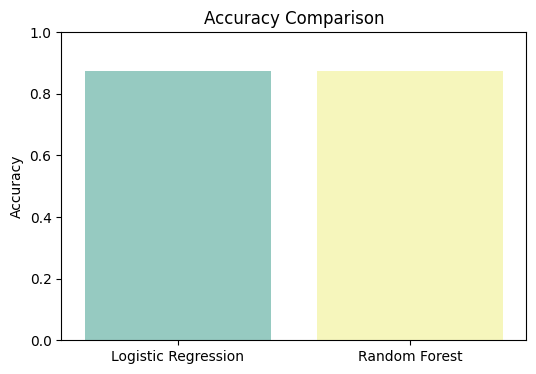

In [26]:
# 14. Compare Accuracy
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.barplot(x=["Logistic Regression", "Random Forest"], y=[acc_log, acc_rf], palette='Set3')
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

C:\Users\riyas\AppData\Local\Temp\ipykernel_6836\4204423114.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


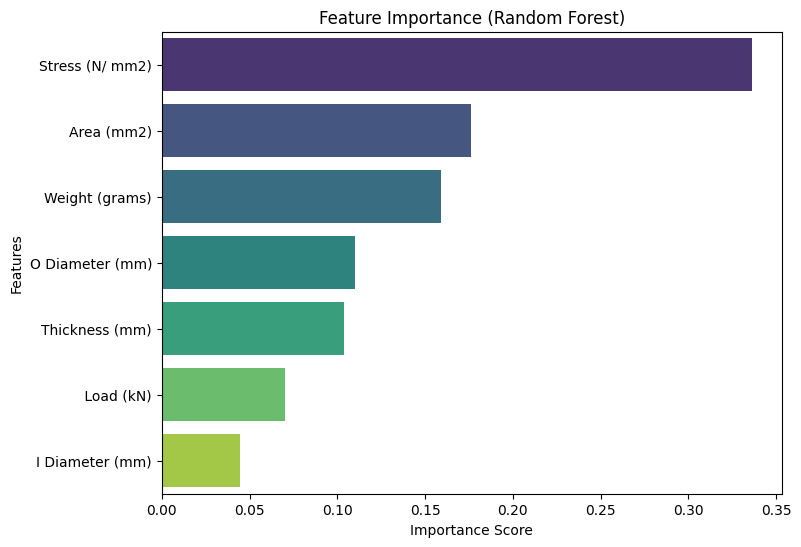

In [27]:
# 15. Feature Importance (Random Forest)
importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()